**Machine Learning (IE406)**

Assignment 8

Krunal Lukhi 201901449

In [ ]:
import pandas as pd
import numpy as np
from math import sqrt
from sklearn.metrics import mean_squared_error 
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC # "Support vector classifier"

**Classification** 

importing data 

In [ ]:
data = pd.read_csv("Social_Network_Ads.csv")
print(data)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


feature extraction

In [ ]:
X2 = np.array(data[['Gender','Age','EstimatedSalary']])
X2=X2.reshape(len(X2),3)
Y2 = np.array(data['Purchased'])
n,m=X2.shape
for i in range(n):
  if(X2[i][0]=='Male'):
    X2[i][0]=1
  else:
    X2[i][0]=0;


spillitng and nomrmalizing data

In [ ]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2)
scaler2 = StandardScaler() #MinMAxScaler()
X2_train_normal= scaler2.fit_transform(X2_train)
X2_test_normal=scaler2.fit_transform(X2_test)

5 neighbors and 'minkowski' distance matrix with p=2

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 ) 
knn2.fit(X2_train_normal, Y2_train)
Y2_est=knn2.predict(X2_train_normal)
Y2_pred = knn2.predict(X2_test_normal)

In [ ]:
print("Confusion Matrix: \n",confusion_matrix(Y2_test, Y2_pred))
print("Classification Report: \n",classification_report(Y2_test, Y2_pred))


Confusion Matrix: 
 [[50  7]
 [ 3 20]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.94      0.88      0.91        57
           1       0.74      0.87      0.80        23

    accuracy                           0.88        80
   macro avg       0.84      0.87      0.85        80
weighted avg       0.89      0.88      0.88        80



10 neighbors and 'minkowski' distance matrix with p=5

In [ ]:
knn3 = KNeighborsClassifier(n_neighbors=20, metric='minkowski', p=5 ) 
knn3.fit(X2_train_normal, Y2_train)
Y3_est=knn3.predict(X2_train_normal)
Y3_pred = knn3.predict(X2_test_normal)

In [ ]:
print("Confusion Matrix: \n",confusion_matrix(Y2_test, Y3_pred))
print("Classification Report: \n",classification_report(Y2_test, Y3_pred))


Confusion Matrix: 
 [[53  4]
 [ 4 19]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        57
           1       0.83      0.83      0.83        23

    accuracy                           0.90        80
   macro avg       0.88      0.88      0.88        80
weighted avg       0.90      0.90      0.90        80



2 neighbors and 'manhattan' distance matrix 

In [ ]:
knn4 = KNeighborsClassifier(n_neighbors=30, metric='manhattan') 
knn4.fit(X2_train_normal, Y2_train)
Y4_est=knn4.predict(X2_train_normal)
Y4_pred = knn4.predict(X2_test_normal)

In [ ]:
print("Confusion Matrix: \n",confusion_matrix(Y2_test, Y4_pred))
print("Classification Report: \n",classification_report(Y2_test, Y4_pred))


Confusion Matrix: 
 [[55  2]
 [ 5 18]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.96      0.94        57
           1       0.90      0.78      0.84        23

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



**Observations:**


1. If k is very low, accuracy is also low. The reason is that for lower values of k, we can have wrong prediction due to insufficient information. When k is high, the algorithm can be computationally expensive. So, we need to find optimal value of k manully. We can start with higher value of k and then keep decreasing it unitl we reach to stable accuracy. 
2. Keeping the distance matrix as 'minkowski', parameter p in KNeighborsClassifier function has very minimum effect on accuracy. p=1 implies 'manhattan' and p=2 implies 'euclidien' distance. 




**Regression**

importing data

In [ ]:
data = pd.read_csv("ahw_dataset.csv")
print(data)

     Index    Height    Weight  Age
0        1  65.78331  112.9925   33
1        2  71.51521  136.4873   34
2        3  69.39874  153.0269   33
3        4  68.21660  142.3354   48
4        5  67.78781  144.2971   57
..     ...       ...       ...  ...
195    196  65.79799  120.8431   31
196    197  66.10558  115.7813   40
197    198  68.23987  128.3019   30
198    199  68.02403  127.4718   33
199    200  71.39044  127.8761   50

[200 rows x 4 columns]


feature extraction

In [ ]:
X1 = np.array(data[['Age','Height']])
X1=X1.reshape(len(X1),2)
Y1 = np.array(data['Weight'])

splitting data nad normalizing data

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2)
scaler1 = StandardScaler() #MinMAxScaler()
X2_train_normal= scaler1.fit_transform(X1_train)
X2_test_normal=scaler1.fit_transform(X1_test)

regression

In [ ]:
rmse_val=[]
for k in range(1,26):
  knn1=KNeighborsRegressor(n_neighbors=k)
  knn1.fit(X1_train, Y1_train)  #fit the model
  Y1_pred=knn1.predict(X1_test) #make prediction on test set
  error = sqrt(mean_squared_error(Y1_test,Y1_pred)) #calculate rmse
  rmse_val.append(error) #store rmse values
  print('RMSE value for k= ' , k , 'is:', error)


RMSE value for k=  1 is: 13.839636439864398
RMSE value for k=  2 is: 11.687080323377872
RMSE value for k=  3 is: 11.16981067713508
RMSE value for k=  4 is: 10.335097889904667
RMSE value for k=  5 is: 10.305862662394238
RMSE value for k=  6 is: 10.64666733903618
RMSE value for k=  7 is: 10.247883762298109
RMSE value for k=  8 is: 10.452551653588802
RMSE value for k=  9 is: 10.540558366356139
RMSE value for k=  10 is: 10.37236926527946
RMSE value for k=  11 is: 10.509929489095452
RMSE value for k=  12 is: 10.275903480964006
RMSE value for k=  13 is: 10.246678561637646
RMSE value for k=  14 is: 10.524868215282845
RMSE value for k=  15 is: 10.523212275964912
RMSE value for k=  16 is: 10.557126871090569
RMSE value for k=  17 is: 10.567274790711137
RMSE value for k=  18 is: 10.662025846697624
RMSE value for k=  19 is: 10.548645302688879
RMSE value for k=  20 is: 10.731225345509019
RMSE value for k=  21 is: 10.802165872133362
RMSE value for k=  22 is: 10.758678321932981
RMSE value for k=  23 

plotting graph of k vs RMSE

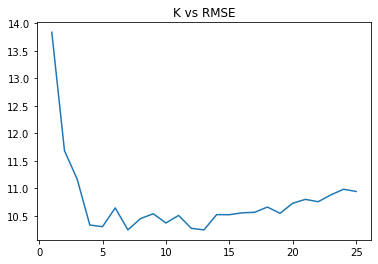

In [ ]:
plt.figure()
plt.plot(range(1,26),rmse_val)
plt.title('K vs RMSE')
plt.show()



For smaller values of k, RMSE is high. The reason is that we won't have enough datapoints to fit the data. As we increase k, RMSE decrease. This shows us that we are reaching towards optimal value of k. After somepoint, RMSE will again increase because of overfitting. For our case optimal value of k=13.